In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df.action.shape[0]

8188

In [15]:
# number of unique users
df.id.nunique()

6328

In [19]:
# size of control group and experiment group
df.groupby(['group']).nunique()

,timestamp,id,action
group,,,
control,4264,3332,2
experiment,3924,2996,2


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [21]:
# duration of this experiment
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [23]:
# action types in this experiment
df.groupby(['action']).nunique()

,timestamp,id,group
action,,,
click,1860,1860,2
view,6328,6328,2


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

- More total clicks could occur in one version, even if there is a greater percentage of clicks in the other version.
- The control and experiment pages could have different numbers of total visitors.

### 5. Define the click through rate (CTR) for this experiment.

- The number of unique visitors who click at least once divided by the number of unique visitors who view the page.

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} - CTR_{old} <= 0$$
$$H_1: CTR_{new} - CTR_{old} > 0$$

In [26]:
control_df = df.query('group == "control"')
control_df

,timestamp,id,group,action
3,2016-09-24 19:59:02.646620,671993,control,view
9,2016-09-24 21:00:12.278374,560027,control,view
23,2016-09-25 00:25:14.141290,281985,control,view
24,2016-09-25 01:14:48.603202,407864,control,view
25,2016-09-25 02:16:11.046654,342984,control,view
...,...,...,...,...
8178,2017-01-18 08:17:12.675797,616692,control,view
8181,2017-01-18 09:07:37.661143,795585,control,view
8182,2017-01-18 09:09:17.363917,795585,control,click
8186,2017-01-18 10:08:51.588469,505451,control,view


In [27]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.2797118847539016

In [28]:
experiment_df = df.query('group == "experiment"')
experiment_df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
...,...,...,...,...
8179,2017-01-18 08:53:50.910310,615849,experiment,view
8180,2017-01-18 08:54:56.879682,615849,experiment,click
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view


In [29]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [30]:
# calculate the observed (based on data) difference between the two groups (its about 3%)
observed_diff = experiment_ctr - control_ctr
observed_diff

0.030034443684015644

### 7. Now I'll simulate (using bootstrapping) sampling distribution for the difference in proportions (or difference in click through rates).

In [32]:
diffs = []
for i in range(10000):
    test_sample = df.sample(df.shape[0], replace=True)
    control_df = test_sample.query('group == "control"')
    experiment_df = test_sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

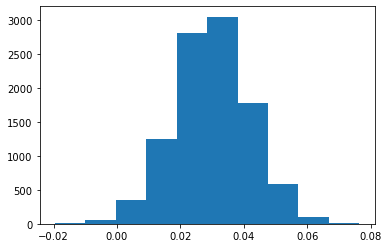

In [34]:

plt.hist(diffs);

In [36]:
diffs = np.array(diffs)
null_values = np.random.normal(0, diffs.std(), diffs.size)

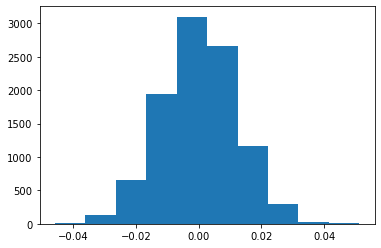

In [38]:
plt.hist(null_values);

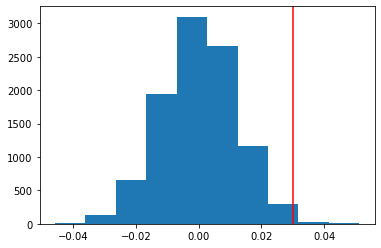

In [39]:
plt.hist(null_values);
plt.axvline(x = observed_diff, color = 'red');

In [41]:
# calculating the p-value
p_value = (null_values > observed_diff).mean()
p_value

0.0061

#### This p-value is less than 0.01 so is very unlikely that our statistic came from the NULL hypothesis.
#### So the only logical step is to reject the NULL hypothesis and recommend to the company the use of the new web page.